# Appendix B.3 - Probability

In **machine learning**, we frequently encounter **uncertainty**, which prevents systems (such as spam classifiers) from achieving perfect accuracy. Uncertainty can be divided into two main types: **epistemic (systematic)** uncertainty and **aleatoric (intrinsic or stochastic)** uncertainty.

- **Epistemic uncertainty** arises from limited or incomplete training data (such as missing examples of rare spam patterns). It can be reduced by collecting more diverse and representative datasets to improve model knowledge.  
- **Aleatoric uncertainty**, on the other hand, stems from inherent noise in the data itself (like ambiguous or unclear email content). While this type of uncertainty cannot be entirely eliminated, it can be mitigated by incorporating additional contextual features, such as the sender's reputation or historical behavior.

**Statistics** is the science of extracting meaningful information from **data**. It allows us to summarize complex, large datasets in ways that are clear and interpretable. 

The probability theory is the branch of mathematics that analyzes random phenomena and provides tools to calculate the likelihood (or chance) that a certain event will occur, while statistics uses data to inform and validate those probabilities. For a concise explanation, you can check out [this short video](https://www.youtube.com/watch?v=arJxFjaMsBM&t=1s).

![](images/prob-stat-vs-prob.png)

## Discrete variables

The concept of **probability** can be introduced through the **frequency of repeatable events**. For instance, consider a biased coin. When flipped many times, it lands heads up 60% of the time and tails up 40% of the time. In this case, we say the probability of landing heads is 60% or 0.6. Strictly speaking, probability is defined in the **limit of an infinite number of trials**. This interpretation, which relies on the relative frequency of outcomes, forms the basis of the **frequentist view** of statistics.

Now, imagine we don’t know the outcome of the experiment, but we must bet on whether the coin will land heads or tails. In the absence of prior information, symmetry suggests assigning equal probabilities: 50-50 for heads and tails. A more formal analysis confirms that, without additional data, assigning a probability of 0.5 to heads is rational. Here, probability serves as a **measure of uncertainty**, aligning with the **Bayesian perspective**. Unlike the frequentist approach, the Bayesian view generalizes probability to incorporate **subjective beliefs** and situations with incomplete information. For example, as we observe a series of coin flips, we can update our understanding of the likelihood of heads using **Bayesian reasoning**. Each new observation helps refine our estimates, progressively reducing uncertainty. This dynamic process highlights the Bayesian approach’s strength in learning from evidence and adapting as more data becomes available.

### Sum and product rules

Consider a general example involving two variables X and Y and suppose they can take any of the following values:

$\displaystyle X = x_{1}, x_{2}, \ldots, x_{L}$

$\displaystyle Y = y_{1}, y_{2}, \ldots, y_{M}$


Since the values of these variables can vary in a way that is unknown, they are called **random\stochastic variables**. Consider a total of N trials in which we sample both the variables X and Y, and let

- $\displaystyle n_{ij}$ the number of trials in which $\displaystyle X = x_{i}$ and $\displaystyle Y = y_{j}$ 
- $\displaystyle c_{i}$ the number of trials in which $\displaystyle X = x_{i}$ irrespective of the value that Y takes, and 
- $\displaystyle d_{j}$ the number of trials in which $\displaystyle Y = y_{j}$ irrespective of the value that X takes

![](images/prob-sum-and-product-rules.png)

The probability that X will take a specific value and Y will take a specific value is called the **joint probability** and it is give by the number of trials in which X and Y take the specific values divided by the total number of trials:

$\displaystyle p(X=x_{i}, Y=y_{j}) = \frac{n_{ij}}{N}$

Similarly, the probability that X takes a value xi irrespective of the value of Y and the probability that Y takes a value irrespective of the value of X are called the **marginal probabilities** and are given by:

$\displaystyle p(X=x_{i}) = \frac{c_{i}}{N}$

$\displaystyle p(Y=y_{j}) = \frac{d_{j}}{N}$

Here we are implicitly considering the limit N to infinity, so that the probabilities are well defined. Since

$\displaystyle \sum\limits_{i=1}^{L}{c_{i}} = N$

we have that the sum of the marginal probabilities is equal to 1:

$\displaystyle \sum\limits_{i=1}^{L}{p(X=x_{i})} = 1$

Because the number of instances in a column is just the sum of the number of instances in each cell of that column, we have 

$\displaystyle c_{i} = \sum\limits_{j=1}^{M}{n_{ij}}$

and then **the sum rule of probability** is given by:

$\displaystyle p(X=x_{i}) = \sum\limits_{j=1}^{M}{p(X=x_{i}, Y=y_{j})}$


If we consider only those instances for which X with a specific value, then the fraction of such instances for which Y has another value is called the
**conditional probability**  and it is obtained by finding the fraction of those points in the column corresponding to the value of X that fall in the cell identified by the value of Y:

$\displaystyle p(Y = y_{j} | X = x_{i}) = \frac{n_{ij}}{c_{i}}$

Summing both sides over the values of Y we obtain:

$\displaystyle \sum\limits_{j=1}^{M}{p(Y=y_{j}|X=x_{i})} = 1$

From previous equations we can obtain the **product rule of probability**:

$\displaystyle p(X=x_{i}, Y=y_{j}) = \frac{n_{ij}}{N} = \frac{n_{ij}}{c_{i}} \frac{c_{i}}{N} =  p(Y=y_{j}|X=x_{i}) p(X=x_{i})$

So far, we have been quite careful to make a distinction between a **random variable** (such as X) and **the values that the random variable can take** (e.g. xi). Although this helps to avoid ambiguity, it leads to a rather cumbersome notation, and in many cases there will be no need for such pedantry. Instead, we may simply write:

- $p(X)$ to denote a distribution over the random variable $X$
- $p(x_i)$ to denote the distribution evaluated for the particular value $x_i$
 

With this more compact notation, we can write the two fundamental rules of
probability theory in the following form:

$\displaystyle p(X) = \sum\limits_{Y} p(X, Y)$

$\displaystyle p(X, Y) = p(Y | X) p(X)$

togheter:

$\displaystyle p(X) = \sum\limits_{Y} p(X|Y)p(Y)$

Here: 

- $p(X,Y)$ is the **joint probability** and is verbalized as **the probability of $X$ and $Y$** 
- $p(Y|X)$ is the **conditional probability** and is verbalized as **the probability of Y given X**
- $p(X)$ is a **marginal probability** and is simply **the probability of X**

We can illustration a distribution over two variables, X which takes 6 possible values, and Y which takes 3 possible values. We sample 60 points drawn from a joint probability distribution over these variables: 

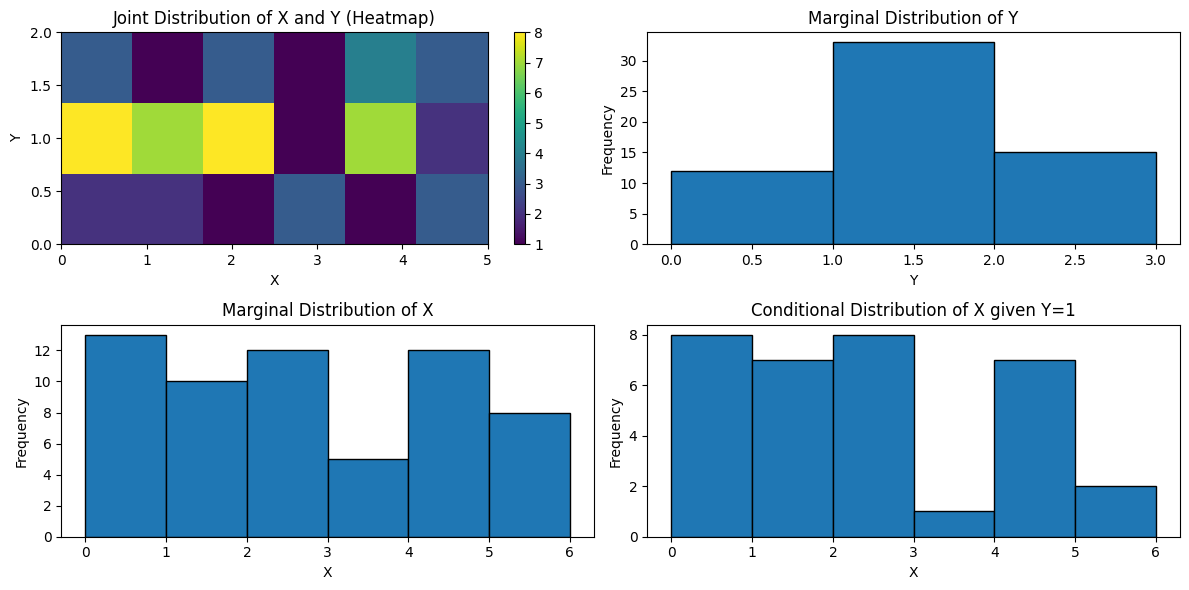

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# define probabilities for X and Y
x_probs = [0.1, 0.1, 0.2, 0.3, 0.2, 0.1]
y_probs = [0.2, 0.5, 0.3]

# define the number of samples
N = 60

# generate X using weighted random choice
X = np.random.choice(np.arange(0, 6), size=N, p=x_probs)
Y = np.random.choice(np.arange(0, 3), size=N, p=y_probs)

# create a figure with subplots
plt.figure(figsize=(12, 6))

# subplot 1: joint distribution (Heatmap)
plt.subplot(2, 2, 1)
plt.hist2d(X, Y, bins=[6, 3], cmap='viridis')
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Joint Distribution of X and Y (Heatmap)')

# subplot 2: marginal distribution of Y
plt.subplot(2, 2, 2)
plt.hist(Y, bins=np.arange(0, 4), edgecolor='black')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Marginal Distribution of Y')

# subplot 3: marginal distribution of X
plt.subplot(2, 2, 3)
plt.hist(X, bins=np.arange(0, 7), edgecolor='black')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Marginal Distribution of X')

# subplot 4: conditional distribution of X given Y=1
plt.subplot(2, 2, 4)
plt.hist(X[Y == 1], bins=np.arange(0, 7), edgecolor='black')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Conditional Distribution of X given Y=1')

plt.tight_layout()
plt.show()

In the top left is a heatmap of the joint probability distribution. The color of each square represents the number of points in the sample that have the corresponding values of X and Y. The top right and bottom left plots are the histogram of the marginal distrubution of Y and X. We can view the histogram as a simple way to model a probability distribution given only a finite number of points drawn from that distribution. The remaining plot show the histogram of the conditional distribution.

### Bayes’ theorem

From the product rule, together with a symmetry property, we immediately obtain the following relationship between conditional probabilities:

$\displaystyle p(Y|X) = \frac{p(X|Y) p(Y)}{p(X)}$

which is called **Bayes’ theorem** and it relates the conditional distribution on the left-hand side of the equation, to the reversed conditional distribution on the right-hand side. 

### A screening example

Consider the problem of screening young children population in order to provide detection of Specific Learning Disorders (SLD), and let us suppose that 1% of the overall population actually has SLD. We denote the presence or absence of SLD by the variable S, which can take two values: S=0 corresponds to "No SLD" and S=1 corresponds to "SLD". So we have:

$\displaystyle p(S=1) = 1/100$

$\displaystyle p(S=0) = 99/100$

Note that these satisfy

$\displaystyle p(S=1) + p(S=0) = 1$

Now let us introduce a second random variable T representing the outcome of a
test, where T=1 denotes a positive result, indicative of SLD, and T=0 a negative result, indicative of the absence of SLD. Ideally our test would give a positive result for anyone with SLD and a negative result for anyone without. However, tests are not perfect, so we will suppose that when the test is given to children without SLD, 10% of them will test positive. These are known as **false positives**. Similarly, when the test is given to children with SLD, 10% of them will test negative. These are called **false negatives**. We can therefore write out all four conditional probabilities:  

$\displaystyle p(T=1|S=1) = 90/100$

$\displaystyle p(T=0|S=1) = 10/100$

$\displaystyle p(T=1|S=0) = 3/100$

$\displaystyle p(T=0|S=0) = 97/100$

Again, note that these probabilities are normalized so that:

$\displaystyle p(T=1|S=1) + p(T=0|S=1) = 1$

$\displaystyle p(T=1|S=0) + p(T=0|S=0) = 1$

Given this information, we might ask the following questions: 
- if we test a child at random, what is the probability that the test will be positive?
- if a child receives a positive result, what is the probability that she actually have SLD?

We can use the sum and product rules of probability to answer the first
question and evaluate the overall probability that a child who is tested at random will have a positive test result:

$\displaystyle p(T=1) = p(T=1|C=0)p(C=0) + p(T=1|C=1)p(C=1)$

$\displaystyle = 3/100 \times 99/100 + 90/100 \times 1/100 = 0.0387$

We see that if a child is tested at random there is a roughly 4% chance that the
test will be positive even though there is a 1% chance that she actually has SLD.

Now consider the second question, if a test is positive, what is the probability that the child has actually SLD? This requires that we evaluate the probability of SLD conditional on the outcome of the test, we can reverse the conditional probability by using Bayes’ theorem:

$\displaystyle p(S=1|T=1) = \frac{p(T=1|S=1)p(S=1)}{p(T=1)}$

$\displaystyle = \frac{90/100 \times 1/100}{0.0387} = 0.23$

so that if a child is tested at random and the test is positive, there is only a 23% probability that she actually has SLD.

### Prior and posterior probabilities

We can use the screening example to provide an important interpretation of Bayes’ theorem. If we had been asked whether someone is likely to have SLD, before they have received a test, then the most complete information we have available is provided by the probability p(S). We call this the **prior probability** because it is the probability available **before we observe the result of the test**. Once we are told that this person has received a positive test, we can then use Bayes’ theorem to compute the probability p(C|T), which we will call the **posterior probability** because it is the probability obtained **after we have observed the test result**. In this example, the prior probability of having SLD is 1%. However, once we
have observed that the test result is positive, we find that the posterior probability of SLD is now 23%, which is a substantially higher probability of cancer, as we would intuitively expect. We note, however, that a chil with a positive test still has only a 23% change of actually having SLD, even though the test appears, from to be reasonably "accurate". This conclusion seems counter-intuitive. The reason has to do with the low prior probability of having SLD. Although the test provides strong evidence of SLD, this has to be combined with the prior probability to arrive at the correct posterior probability.

### Independent variables

If the joint distribution of two variables factorizes into the product of the marginals:

$\displaystyle p(X, Y) = p(X)p(Y)$

then X and Y are said to be **independent**. An example of independent events would be the successive flips of a coin. From the product rule, we see that the conditional distribution of Y given X is independent of the value of X:

$\displaystyle p(Y|X) = p(Y)$

In the screening example, if the probability of a positive test is independent of whether the child has SLD, then the probability of SLD not change by observing the test outcome. Of course, such a test would be useless because the outcome of the test tells us nothing about whether the child has SLD or not.

## Continuous variables

As well as considering probabilities defined over discrete sets of values, we also wish to consider **probabilities with respect to continuous variables**. Since there will be uncertainty about the value of a continuous variable, we want to quantify this uncertainty and again we can make use of probabilities. However, we cannot simply apply the concepts of probability discussed so far directly, becouse we have infinite values and the probability of each individual point must necessarily be zero:

$\displaystyle p(X = x) = 0$ 

### Probability Density

We need to introduce the concept of a **probability density**, as a function that gives the probability of a random variable falling within an infinitesimal range of values:

$\displaystyle p(x \in [a, b]) = \int_{a}^{b} p(x)dx$

Because probabilities are non-negative, and because the value of the variable must lie somewhere, the probability density must satisfy two conditions:

$\displaystyle p(x) \geq 0$

$\displaystyle \int_{-\infty}^{\infty} p(x)dx = 1$

### Cumulative Distribution

The probability that the variable lies in the interval from negative infinity to a value is the **cumulative distribution** function:

$\displaystyle P(z) = \int_{-\infty}^{z} p(x)dx$

The probability density can be expressed as the derivative of the cumulative distribution.

![](images/prob-concepts.png)

### Joint probability density

If we have several continuous variables denoted collectively by a vector, then we can define a **joint probability density**:

$\displaystyle p(\mathbf{x}) = p(x_{1}, x_{2}, \ldots, x_{D})$

such as the probability of the vector falling in an infinitesimal volume. This multivariate probability density must satisfy:

$\displaystyle p(\mathbf{x}) \geq 0$

$\displaystyle \int p(\mathbf{x})d\mathbf{x} = 1$

in which the integral is taken over the whole of multidimensional space. More generally, we can also consider joint probability distributions over a combination of discrete and continuous variables.

### Sum and product ruels and Bayes’ theorem

The sum and product rules of probability, as well as Bayes’ theorem, also apply to probability densities as well as to combinations of discrete and continuous variables, in the form:

$\displaystyle p(x) = \int p(x,y)dy$

$\displaystyle p(x,y) = p(y|x)p(x)$

$\displaystyle p(x) = \int p(x|y)p(y)dy$

$\displaystyle p(y|x) = \frac{p(x|y)p(y)}{p(x)}$

A formal justification of the sum and product rules for continuous variables requires a branch of mathematics called **measure theory** and lies outside
the scope of this courese. Its validity can be seen informally, however, by dividing each real variable into intervals of width delta and considering the discrete probability distribution over these intervals. Taking the limit of delta to zero then turns sums into integrals and gives the desired result.

### Expectation

One of the most important operations involving probabilities is that of finding **weighted averages** of functions. The weighted average of some function under a probability distribution is called the **expectation** of the function. For a discrete distribution, it is given by summing over all possible values of the variable:

$\displaystyle E[f] = \sum\limits_{x} p(x)f(x)$

For continuous variables, expectations are expressed in terms of an integration
with respect to the corresponding probability density

$\displaystyle E[f] = \int p(x)f(x)dx$

In either case, if we are given a finite number N of points drawn from the probability density, then the expectation can be approximated as a finite sum over these points:

$\displaystyle E[f] \approx \frac{1}{N} \sum\limits_{n=1}^{N} f(x_{n})$

The approximation in becomes exact in the limit of N to infinity.

### Covariance

The **variance** of a function is defined by:

$\displaystyle var[f] = E[(f(x) - E[f(x)])^{2}]$

which provides a measure of how much the function varies around its expected value. Expanding out the square, we see that the variance can also be written as:

$\displaystyle var[f] = E[f(x)^{2} - 2 f(x)E[f(x)] + E[f(x)]^{2}]$

$\displaystyle = E[f(x)^{2}] - 2 E[f(x)]E[f(x)] + E[f(x)]^{2}$

$\displaystyle = E[f(x)^{2}] - E[f(x)]^{2}$

For two random variables, the covariance measures **the extent to which the two variables vary together** and is defined by:

$\displaystyle cov[x, y] = E[(x - E[x])(y - E[y])]$

$\displaystyle = E[xy] - E[x]E[y]$

If the two variable are independent, then their covariance equals zero.

For two vectors, their covariance is a matrix given by:

$\displaystyle cov[\mathbf{x}, \mathbf{y}] = E[(\mathbf{x} - E[\mathbf{x}])(\mathbf{y^T} - E[\mathbf{y^T}])]$

$\displaystyle = E[\mathbf{x}\mathbf{y^T}] - E[\mathbf{x}]E[\mathbf{y^T}]$

Notice that **correlation is not causation**: if x and y are strongly correlated, that might mean that x causes y or that y causes x, but also that some third factor causes both, or nothing at all.

## Notable probability distributions

Probability distributions are fundamental in statistics, data analysis, and machine learning, as they describe how random variables behave. Each distribution is defined by a unique set of parameters and mathematical properties, making it suited to specific types of data or phenomena. Understanding these distributions allows us to model uncertainties, make predictions, and analyze patterns in data. We can consider some of the most commonly used probability distributions, both discrete and continuous.

### Bernoulli distribution

The **Bernoulli distribution** is used to model an experiment with only two possible outcomes. The two outcomes are often encoded as 1 and 0

$\displaystyle p(x)={\begin{cases}p,&{\text{if }}x{\text{ is 1}}\\1-p,&{\text{if }}x{\text{ is 0}}\end{cases}}$

An example of the Bernoulli distribution is tossing a coin.

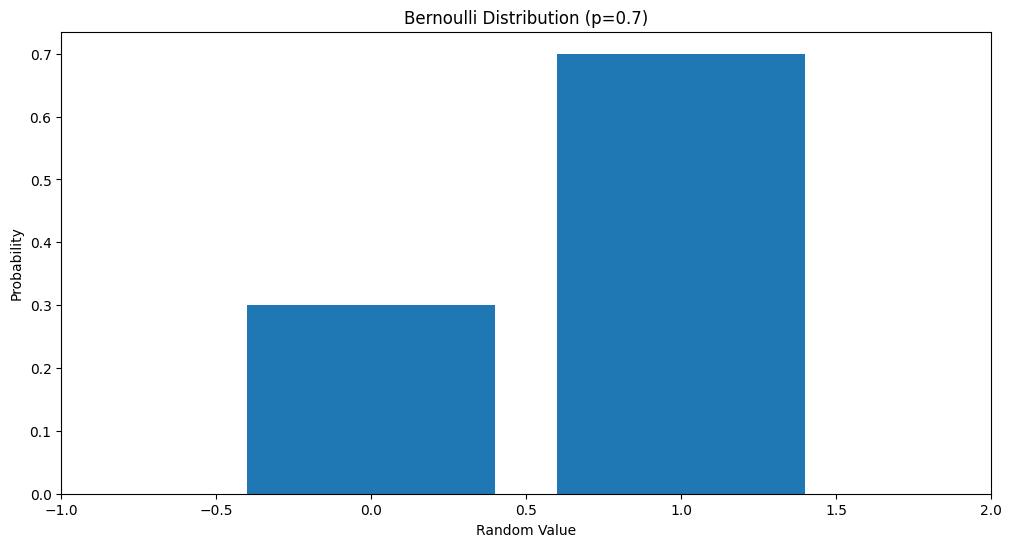

In [39]:
from scipy.stats import bernoulli

# define the probability of success
p=0.7

# define the possible values of x
x = [0, 1]

# calculate the distribution
y_bernoulli = bernoulli(p).pmf(x)

# plot the distribution   
plt.figure(figsize=(12, 6))
plt.bar(x, y_bernoulli)
plt.xlim(-1, 2)
plt.title('Bernoulli Distribution (p=0.7)')
plt.xlabel('Random Value')
plt.ylabel('Probability')
plt.show()

### Geometry distribution

The **Geometric distribution** expresses the probability distribution of a random variable representing the number of Bernoulli trials k needed to get one success, where p is the probability of success in each trial.

$\displaystyle \textstyle p(k)=(1-p)^{k-1}p$

An example is tossing a coin until the first head appears. 

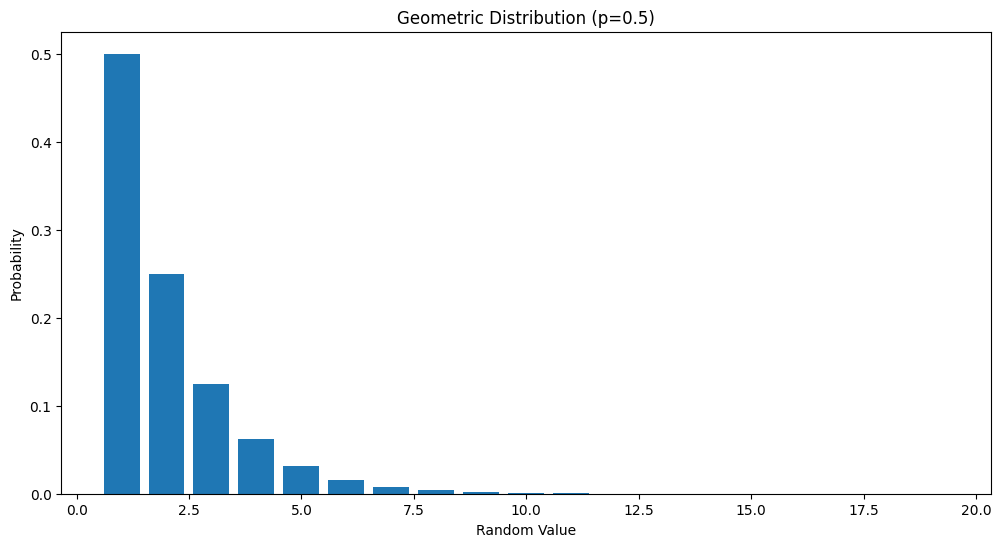

In [40]:
from scipy.stats import geom

# define the probability of success
p = 0.5

# define the possible values of x
x = np.arange(1, 20, 1)   

# calculate the distribution
y_geometric = geom.pmf(x, p)

# plot the distribution  
plt.figure(figsize=(12, 6))
plt.bar(x, y_geometric)
plt.title('Geometric Distribution (p=0.5)')
plt.xlabel('Random Value')
plt.ylabel('Probability') 
plt.show()

### Binomial distribution

The **Binomial distribution** describes the probability of observing a specific number of k successes in a sequence of n independent experiments, where each experiment results in one of two possible outcomes (commonly referred to as "success" and "failure"). Each experiment is modeled as a Bernoulli random variable with a success probability p.  In simpler terms, the Binomial distribution models scenarios where you perform repeated trials of a yes–no experiment, such as flipping a coin or answering a true–false question. The probability of achieving exactly k successes in n trials is given by:

$\displaystyle p(k) = \frac{n!}{k!(n-k)!} p^k (1-p)^{n-k}$

The formula can be understood as follows: 
- k successes occur with probability $p^k$ 
- $(n - k)$ failures occur with probability $(1-p)^{n-k}$
- the k successes can occur anywhere among the n trials, and there are $\frac{n!}{k!(n-k)!}$ different ways of distributing k successes in a sequence of n trials: 

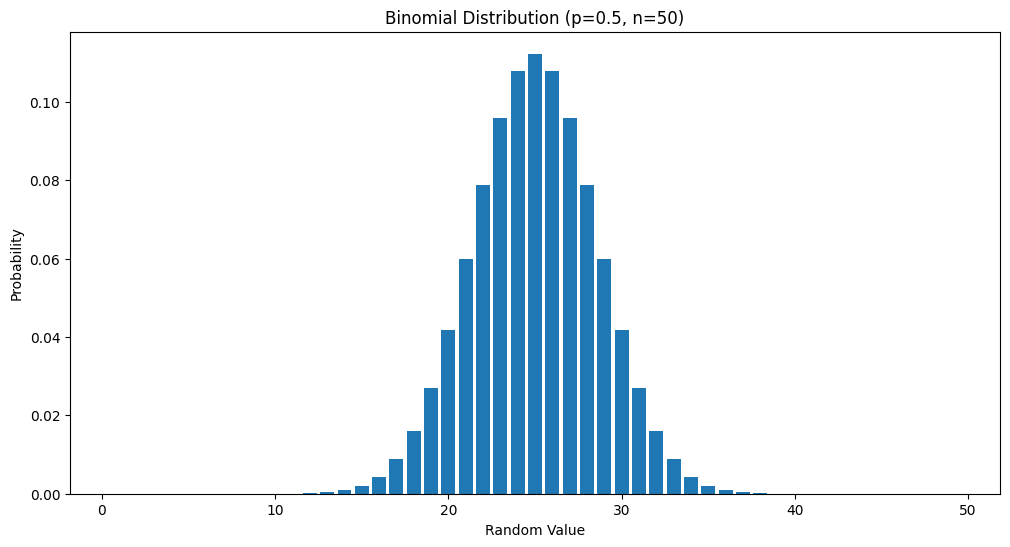

In [41]:
from scipy.stats import binom

# define the probability of success
p = 0.5

# define the number of trials
n = 50

# define the possible values of X
x = np.arange(1, 50, 1)

# calculate the distribution
y_binomial = binom.pmf(x, n, p)

# plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(x, y_binomial) 
plt.title('Binomial Distribution (p=0.5, n=50)')
plt.xlabel('Random Value')
plt.ylabel('Probability') 
plt.show()

### Uniform distribution

One of simplest form of continous distribution is the **uniform distribution** which is constant over a finite region, and zero elsewhere. Such a distribution describes an experiment where there is an arbitrary outcome that lies between certain bounds. The bounds are defined by the parameters a and b, which are the minimum and maximum values. 

$\displaystyle p(x)={\begin{cases}{\frac {1}{b-a}}&{\text{for }}a\leq x\leq b\\[8pt]0&{\text{for }}x<a\ {\text{ or }}\ x>b\end{cases}}$

$\displaystyle P(x)={\begin{cases}0&{\text{for }}x<a\\[8pt]{\frac {x-a}{b-a}}&{\text{for }}a\leq x\leq b\\[8pt]1&{\text{for }}x>b.\end{cases}}$

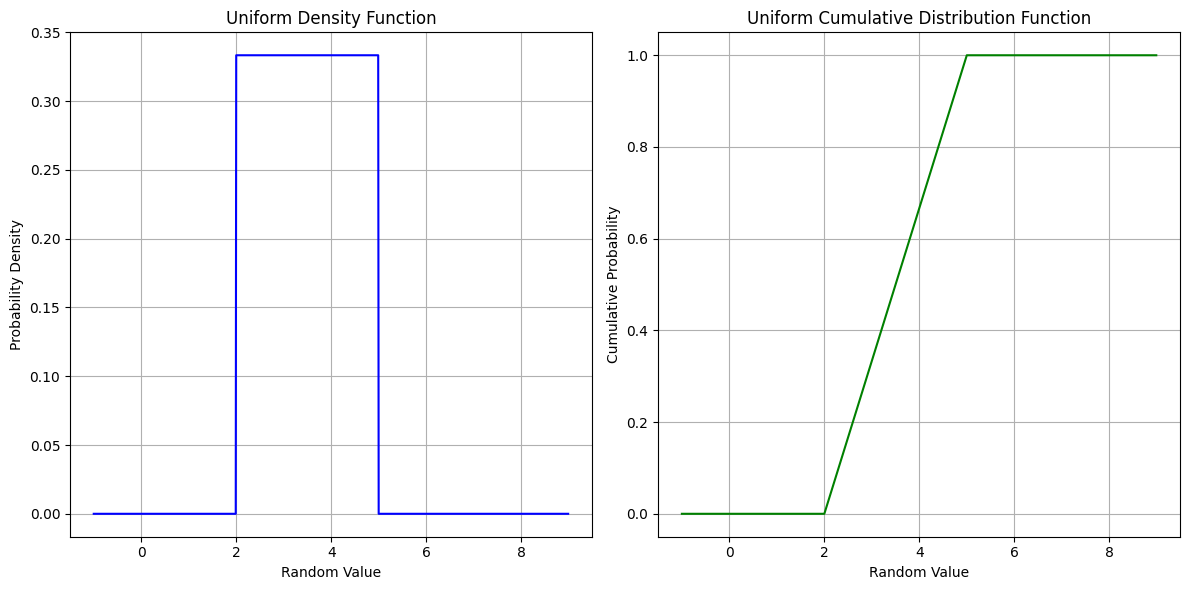

In [42]:
from scipy.stats import uniform

# parameters for the uniform distribution
a = 2
b = 5

# define the range for x
x = np.arange(-1, 9, 0.01)

# calculate the density and cumulative distribution functions
y_pdf = uniform.pdf(x, loc=a, scale=(b-a))
y_cdf = uniform.cdf(x, loc=a, scale=(b-a))

# create a single figure with two subplots
plt.figure(figsize=(12, 6))

# plot the uniform density function
plt.subplot(1, 2, 1)
plt.plot(x, y_pdf, color='blue')
plt.title("Uniform Density Function")
plt.xlabel('Random Value')
plt.ylabel('Probability Density')
plt.grid(True)

# plot the uniform cumulative distribution function
plt.subplot(1, 2, 2)
plt.plot(x, y_cdf, color='green')
plt.title("Uniform Cumulative Distribution Function")
plt.xlabel('Random Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()


### Exponential distribution

Another simple form of density is the exponential distribution given by

$p(x|\lambda) = \lambda e^{(-\lambda x)}$

$P(x|\lambda) = 1 - e^{(-\lambda x)}$

where $\lambda$ is a parameter of the distribution. The exponential distribution is widely used to model the time until an event occurs, such as the time until a radioactive atom decays or the time until a customer arrives at a shop. A variant is the Laplace distribution, allows the peak to be moved to a location and is given by:

$p(x|\mu, \gamma) = \frac{1}{2\gamma} e^{(-\frac{|x-\mu|}{\gamma})}$

$P(x|\mu, \gamma) = \frac{1}{2} e^{(\frac{x-\mu}{\gamma})}$ for $x < \mu$

$P(x|\mu, \gamma) = 1 - \frac{1}{2} e^{(-\frac{x-\mu}{\gamma})}$ for $x \geq \mu$

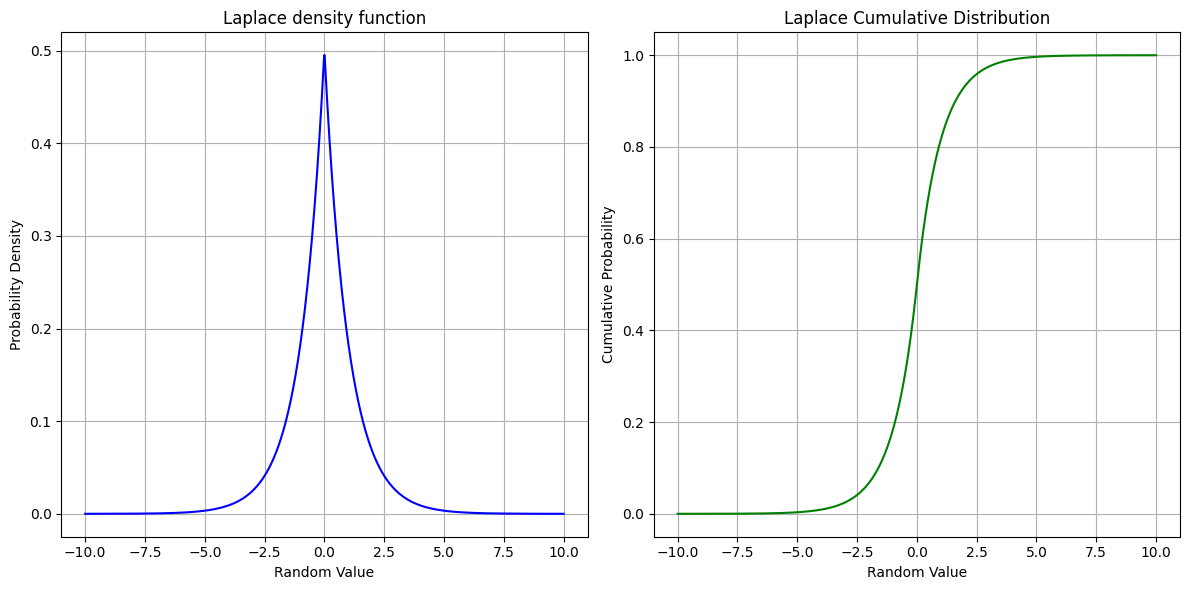

In [43]:
from scipy.stats import laplace

# parameters for the Laplace distribution
mu = 0  # Mean (location parameter)
gamma = 1  # Scale parameter (diversity)

# define the range for x
x = np.linspace(-10, 10, 1000)

# calculate the density and cumulative distribution functions
y_pdf_laplace = laplace.pdf(x, loc=mu, scale=gamma)
y_cdf_laplace = laplace.cdf(x, loc=mu, scale=gamma)

# create a single figure with two subplots
plt.figure(figsize=(12, 6))

# plot Laplace density function
plt.subplot(1, 2, 1)
plt.plot(x, y_pdf_laplace, color='blue')
plt.title("Laplace density function")
plt.xlabel('Random Value')
plt.ylabel('Probability Density')
plt.grid(True)

# plot Laplace cumulative distribution function
plt.subplot(1, 2, 2)
plt.plot(x, y_cdf_laplace, color='green')
plt.title("Laplace Cumulative Distribution")
plt.xlabel('Random Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

### Dirac delta distribution

Another important density function is the Dirac delta, which is written as:

$\displaystyle p(x|\mu) = \delta(x-\mu)$

This is defined to be zero everywhere except in one point and to have the property of integrating to unity. Informally, we can think of this as an infinitely narrow and infinitely tall spike. If we have a finite set of observations:

$\displaystyle x_{1}, x_{2}, \ldots, x_{N}$

then we can use the delta function to constract the **empirical distribution** given by:

$\displaystyle p(x) = \frac{1}{N} \sum\limits_{n=1}^{N} \delta(x-x_{n})$

which consists of a Dirac delta function centred on each of the data points.

### Gaussian distribution

One of the most important probability distributions for continuous variables is called the **Normal or Gaussian distribution**. For a single real-valued variable, the Gaussian distribution is defined by:

$\displaystyle f(x|\mu, \sigma) =  \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

$\displaystyle P(x|\mu,\sigma) = {\frac {1}{2}}\left[1+ {\frac {2}{\sqrt {\pi }}}\int _{0}^{\left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)}e^{-t^{2}}\,dt\right]$

which represents a probability density governed by two parameters: the **mean** and the **variance**. The square root of the variance, given by is called the **standard deviation**. This distribution is so important that it has a special simbol:

$\displaystyle \mathcal{N}(\mu, \sigma^{2})$

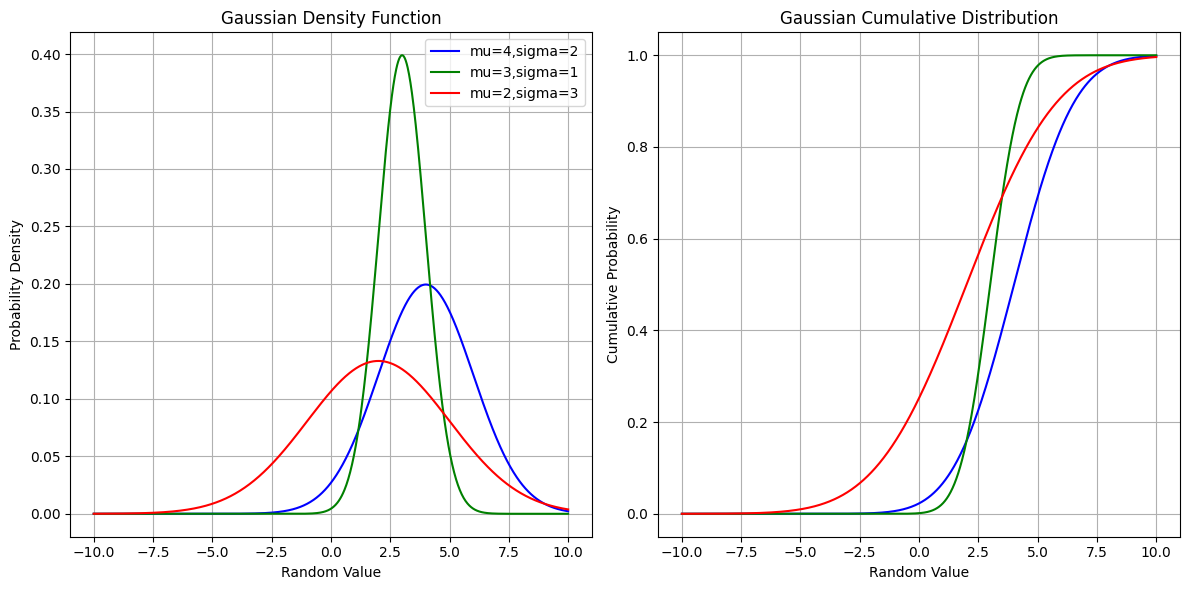

In [44]:
from scipy.stats import norm

# parameters for the Gaussian distribution
mu = [4, 3, 2] # mean (location parameter)
sigma = [2, 1, 3] # standard deviation (scale parameter)

# define the range for x
x = np.linspace(-10, 10, 1000)

# calculate the density and cumulative distribution functions 
# for the Gaussian distribution
y_pdf_gaussian_1 = norm.pdf(x, loc=mu[0], scale=sigma[0])
y_pdf_gaussian_2 = norm.pdf(x, loc=mu[1], scale=sigma[1])
y_pdf_gaussian_3 = norm.pdf(x, loc=mu[2], scale=sigma[2])

y_cdf_gaussian_1 = norm.cdf(x, loc=mu[0], scale=sigma[0])
y_cdf_gaussian_2 = norm.cdf(x, loc=mu[1], scale=sigma[1])
y_cdf_gaussian_3 = norm.cdf(x, loc=mu[2], scale=sigma[2])

# create a single figure with two subplots
plt.figure(figsize=(12, 6))

# plot Gaussian density function
plt.subplot(1, 2, 1)
plt.plot(x, y_pdf_gaussian_1, color='blue', label='mu=4,sigma=2')
plt.plot(x, y_pdf_gaussian_2, color='green', label='mu=3,sigma=1')
plt.plot(x, y_pdf_gaussian_3, color='red', label='mu=2,sigma=3')
plt.title("Gaussian Density Function")
plt.xlabel('Random Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# plot Gaussian cumulative distribution function
plt.subplot(1, 2, 2)
plt.plot(x, y_cdf_gaussian_1, color='blue', label='mu=4,sigma=2')
plt.plot(x, y_cdf_gaussian_2, color='green', label='mu=3,sigma=1')
plt.plot(x, y_cdf_gaussian_3, color='red', label='mu=2,sigma=3')
plt.title("Gaussian Cumulative Distribution")
plt.xlabel('Random Value')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

We can readily find expectations of functions of x under the Gaussian distribution. In particular, the expectation of x itself is given by:

$\displaystyle E[x] = \int \mathcal{N}(x|\mu, \sigma^{2}) x dx = \mu$

This integral is known as the **first-order moment** of the distribution because it is the expectation of x raised to the power one. We can similarly evaluate the **second-order moment** given by:

$\displaystyle E[x^{2}] = \int \mathcal{N}(x|\mu, \sigma^{2}) x^{2} dx = \mu^{2} + \sigma^{2}$

Then from those two results we can find the variance of x as:

$\displaystyle var[x] = E[x^{2}] - E[x]^{2} = \sigma^{2}$

The importance of th Gaussian distribution stems from the **central limit theorem**: if we have a population of numbers distributed in any shape (uniform, skewed, bimodal, etc), if we repeatedly take random samples of a fixed size from this population and we calculate the mean of each sample, **the distribution of the sample means becomes approximately normal** as the sample size increases, no matter what the shape of the original population is.

![](images/prob-central-limit-theorem.png)

The mean of the sample means equals the population mean: On average, the sample means will cluster around the true mean of the population. The variance of the sample means decreases as the sample size increases:

$\displaystyle var[\bar{x}] = \frac{\sigma^{2}}{n}$

where $\sigma$ is the population standard deviation and n is the sample size. 

NameError: name 'bins' is not defined

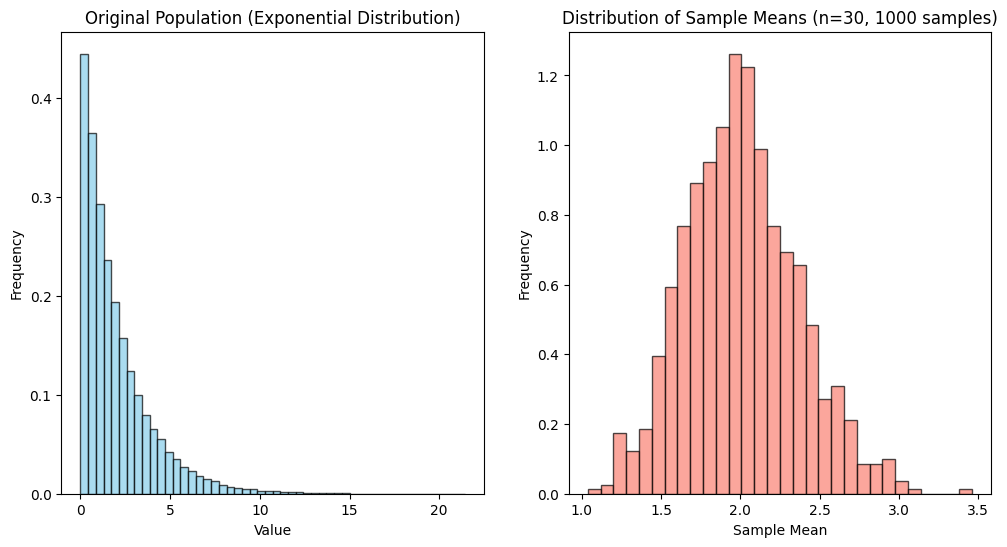

In [45]:
# create a non-normal population (exponential distribution)
population_size = 100000
population = np.random.exponential(scale=2, size=population_size)  

# number of data points in each sample
sample_size = 30

# number of samples to draw
num_samples = 1000  

# draw samples and calculate sample means
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

# calculate the mean and standard deviation of the sample means
mu = np.mean(sample_means)
std = np.std(sample_means)

# plot the results
plt.figure(figsize=(12, 6))

# plot the original population
plt.subplot(1, 2, 1)
plt.hist(population, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Original Population (Exponential Distribution)")
plt.xlabel("Value")
plt.ylabel("Frequency")

# plot the sample means
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, density=True, color='salmon', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of Sample Means (n={sample_size}, {num_samples} samples)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

# overlay normal distribution fit
x = np.linspace(min(bins), max(bins), 1000)
y = norm.pdf(x, loc=mu, scale=std)  # Probability density function
plt.plot(x, y, color='blue', linewidth=2, label="Normal Distribution Fit")

plt.tight_layout()
plt.show()


This is a powerful result that underpins much of modern data analysis and decision-making. Its ability to transform data from arbitrary distributions into something predictable and well-understood as the normal distribution is invaluable. This universality not only simplifies statistical inference but also makes robust data-driven decisions possible across various domains. In machine learning it plays a crucial role. A specific example lies in model evaluation. Suppose we are training a classifier and we want to evaluate its accuracy. Instead of relying on a single performance score, we perform several tests to calculate multiple accuracy scores across different subsets of our dataset. Using the central limit theorem, we know that the mean of the accuracy scores follows a normal distribution, even if the accuracy scores themselves are not normally distributed and the standard error of the mean can be calculated as well. So we can construct a confidence interval for the true accuracy of the model.

## Density estimation

The problem of **estimating a distribution, given a finite set of observations**. We emphasized that this problem is fundamentally **ill-posed**, because there are infinitely many probability distributions that could have given rise to the observed finite data set. Indeed, any distribution p(x) that is non-zero at each of observation is a potential candidate. Here, we constrain the space of distributions to be Gaussians. So, suppose that we have a data set of N observations of a scalar variable x drawn independently from a Gaussian distribution whose mean and variance are unknown:

$\displaystyle \mathbf{x} = (x_{1}, x_{2}, \ldots, x_{N})$

In [83]:
# simulate samples from a normal distribution
mu_true = 3  # true mean
sigma_true = 1.5  # true standard deviation
n_samples = 100  # number of samples

samples = np.random.normal(mu_true, sigma_true, n_samples)

Data points that are **drawn independently from the same distribution** are said to be **independent and identically distributed (i.i.d.)**. We would like to determine the parameters of the Gaussian distribution from the data set:

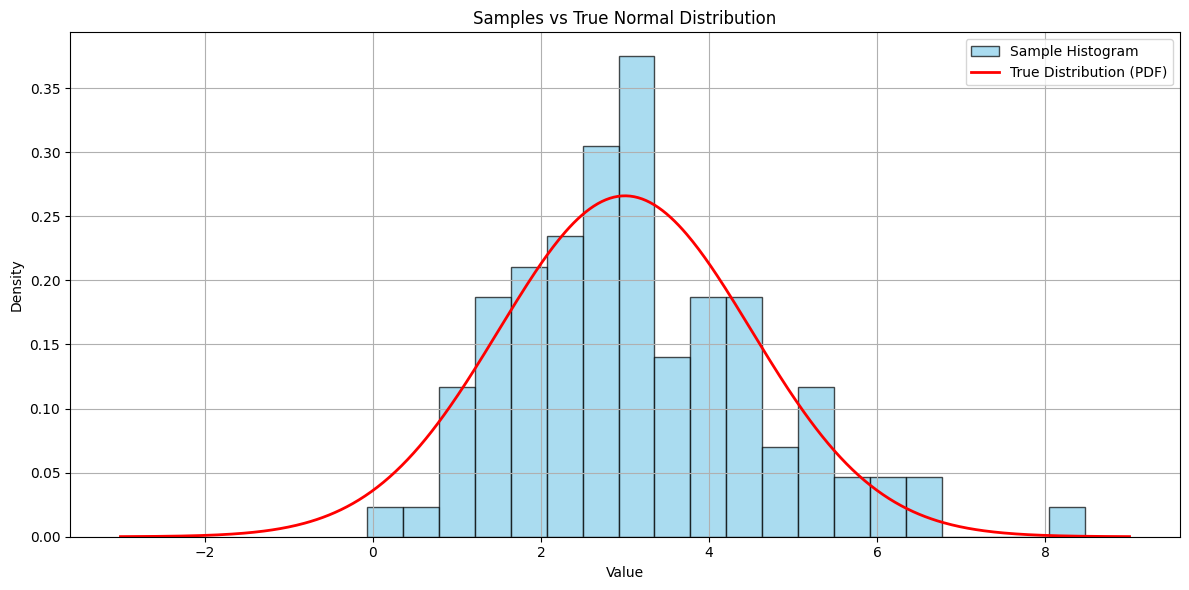

In [84]:
# define the range for the true distribution
x_values = np.linspace(mu_true - 4 * sigma_true, mu_true + 4 * sigma_true, 500)
true_gaussian = norm.pdf(x_values, mu_true, sigma_true)

# plot the histogram of the samples and overlay the true PDF
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label="Sample Histogram")
plt.plot(x_values, true_gaussian, color='red', linewidth=2, label="True Distribution (PDF)")
plt.title("Samples vs True Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We have seen that the joint probability of two independent events is given by the product of the marginal probabilities for each event separately. Because our observations are i.i.d., we can therefore write:

$\displaystyle p(\mathbf{x}|\mu, \sigma^{2}) = \prod_{n=1}^{N} \mathcal{N}(x_{n}|\mu, \sigma^{2}) = \prod_{n=1}^{N} \frac{1}{\sqrt{2\pi\sigma^{2}}} e^{-\frac{(x_{n}-\mu)^{2}}{2\sigma^{2}}}$

When viewed as a function of the distrubution parameters, this is called the **likelihood function**: 

$\displaystyle L(\mu, \sigma) = \prod_{n=1}^{N} \frac{1}{\sqrt{2\pi\sigma^{2}}} e^{-\frac{(x_{n}-\mu)^{2}}{2\sigma^{2}}}$

One common approach for determining the distribution, known as **maximum likelihood**, is to find the parameter values that maximize the likelihood function. To make it easier to work with, we typically maximize the log-likelihood function, which is the natural logarithm of the likelihood function (because the logarithm is a monotonically increasing function, maximizing its log is equivalent to maximizing the function itself; taking the log simplifies the subsequent mathematical analysis, and it helps numerically since the product of a large number of small probabilities can easily underflow the numerical precision of the computer, and this is resolved by computing the sum of the log probabilities instead):

$\displaystyle \ln L(\mu, \sigma) = \sum_{i=1}^{N} \left[ -\frac{1}{2} \ln 2\pi\sigma^2 - \frac{(x_n - \mu)^2}{2\sigma^2} \right]$

We can separate the minimization process for mean and varianza because the log-likelihood function has a separable structure. The part of the log-likelihood that depends on the mean is quadratic, allowing us to solve for it first: 

$\displaystyle \frac{\partial}{\partial \mu} \ln L(\mu, \sigma) = \sum_{n=1}^{N} \frac{x_n - \mu}{\sigma^2} = 0$

solving fro the mean we obtain:

$\displaystyle \mu_{ML} = \frac{1}{N} \sum_{n=1}^{N} x_n$

which is the sample mean (the mean of the observed values). Once the mean is known, the remaining terms depend on the variance, so we can then maximize the log-likelihood with respect to it independently. This decoupling of the two parameters allows us to optimize them separately:

$\displaystyle \frac{\partial}{\partial \sigma} \ln L(\mu, \sigma) = -\frac{N}{\sigma} + \frac{1}{\sigma^3} \sum_{n=1}^{N} (x_n - \mu)^2 = 0$

solvine for the variance we obtain:

$\displaystyle \sigma_{ML}^2 = \frac{1}{N} \sum_{n=1}^{N} (x_n - \mu_{ML})^2$

which is the sample variance measured with respect to the sample mean. 

Estimated Mean: 3.16
Estimated Standard Deviation: 1.49


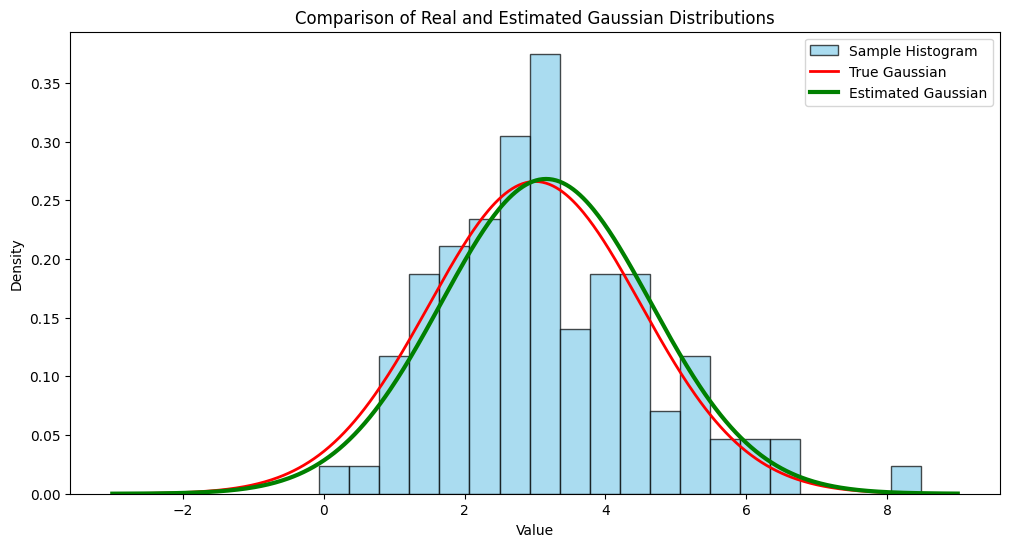

In [85]:
# estimate mean and standard deviation from the samples
estimated_mu = np.mean(samples)
estimated_sigma = np.std(samples)

print(f"Estimated Mean: {estimated_mu:.2f}")
print(f"Estimated Standard Deviation: {estimated_sigma:.2f}")

# estimated Gaussian distribution (from the data)
estimated_gaussian = norm.pdf(x_values, loc=estimated_mu, scale=estimated_sigma)

# plot the histogram of the samples and overlay 
# the real and estimated distributions

plt.figure(figsize=(12, 6))
plt.hist(samples, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label="Sample Histogram")
plt.plot(x_values, true_gaussian, label=f'True Gaussian', color='red', linewidth=2,)
plt.plot(x_values, estimated_gaussian, label=f'Estimated Gaussian', color='green', linewidth=3)
plt.title('Comparison of Real and Estimated Gaussian Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

The technique of maximum likelihood is widely used in machine learning and forms
the foundation for several algorithms. However, it has some limitations. We first note that the maximum likelihood parameters are functions of the obeservations values. We can consider the expectations of mean and variance with respect to these obeservations:

$\displaystyle E[\mu_{ML}] = E[\frac{1}{N} \sum_{n=1}^{N} x_n] = \frac{1}{N} \sum_{n=1}^{N} E[x_n] = \mu$

$\displaystyle E[\sigma_{ML}^2] = E[\frac{1}{N} \sum_{n=1}^{N} (x_n - \mu_{ML})^2] = \frac{1}{N} \sum_{n=1}^{N} E[(x_n - \frac{1}{N} \sum_{m=1}^{N}x_m)^2] =$

$\displaystyle = \frac{1}{N} \sum_{n=1}^{N} E[x_n^2 - \frac{2}{N} x_n \sum_{m=1}^{N} x_m + \frac{1}{N^2} \sum_{m=1}^{N} \sum_{l=1}^{N} x_m x_l] = $

$\displaystyle = \mu^2 + \sigma^2 - 2 (\mu^2 + \frac{1}{N} \sigma^2) + \mu^2 + \frac{1}{N} \sigma^2 = \frac{N-1}{N} \sigma^2$

We see that, when averaged over data sets of a given size, the maximum likelihood solution for the mean will equal the true mean. However, the maximum likelihood **estimate of the variance will underestimate the true variance** by a factor:

$\displaystyle \frac{N-1}{N}$

This is an example of a phenomenon called **bias** in which the estimator of a random quantity is systematically different from the true value. The intuition behind this result is:

![](images/prob-maximum-likelihood.png)

The bias arises because the variance is measured relative to the estimate of the mean, which itself is tuned to the data. Suppose instead we had access to the true mean  and we used this value to determine the variance:

$\displaystyle E[\hat\sigma^2] = E[\frac{1}{N} \sum_{n=1}^{N} (x_n - \mu)^2] = \frac{1}{N} \sum_{n=1}^{N} E[x_n^2 - 2 x_n \mu + \mu^2] = $

$\displaystyle =  \frac{1}{N} \sum_{n=1}^{N} (\mu^2 + \sigma^2 - 2 \mu \mu + \mu^2) = \sigma^2$ 

which is unbiased. Of course, we do not have access to the true mean but only
to the observed data values. However, from the variance estimantion formula for a Gaussian distribution, the following estimate for the variance parameter is unbiased:

$\displaystyle \tilde \sigma^2 = \frac{N}{N-1} \sigma_{ML}^2 = \frac{1}{N-1} \sum_{n=1}^{N} (x_n - \mu_{ML})^2$

Correcting for the bias in complex models is not so easy. However, note that the **bias becomes less significant as the number N of data points increases**. 

## Transformation of Densities

One important property of probability densities is how they transforms under a **nonlinear change of variable**. Consider a variable and suppose we make a change of variable using a monotonic function:

$\displaystyle x = g(y)$

then a function of the first variable becomes a new function defined by:

$\displaystyle f(x) = f(g(y)) = \tilde f(y)$

One consequence of this transformation is that we can find the maximum of a function with respect to one variable by transforming to a new variable, finding the maximum with respect to the new variable, and then transforming back. Suppose the first function has a maximum in a point:

$\displaystyle f'(\hat x) = 0$

the corresponding maximum of the transformed function will occur for a value as:

$\displaystyle \tilde f'(\hat y) = f'(g(\hat y))g'(\hat y) = 0$

assuming that in the point

$\displaystyle g'(\hat y) \neq 0$

then

$\displaystyle f'(g(\hat y)) = 0$

however, we know that the derivative of the function at the maximum is zero, so we see that the locations of the maximum expressed in terms of each of the variables are related as one would expect: 

$\displaystyle \hat x = g(\hat y)$

Thus, finding a maximum with respect to the first variable is equivalent to first transforming to the new variable, then finding the maximum with respect to that variable, and then transforming back.

Now, consider a probability density, and again change variable using the same function:

$\displaystyle p_x(x),  y=g(x) \Rightarrow p_y(y)$

Observation falling in a small interval of x will be transformed into a small interval of y, the probability of the observation falling in the interval is given by:

$\displaystyle p_x(x)dx = p_y(y)dy$

hence, if we take the limit of the intervl to zero, we have:

$\displaystyle p_y(y) = p_x(x) \left| \frac{dx}{dy} \right| = p_x(g(y)) \left| \frac{dg}{dy} \right|$

Here the modulus arises because the derivative could be negative, whereas the density is scaled by the ratio of lengths, which is always positive. To deal with the modulus in we can write 

$\displaystyle p_y(y) = p_x(g(y)) s g'(y)$

where 

$\displaystyle s = \begin{cases}1,&{\text{if }}g'(y) > 0\\-1,&{\text{if }}g'(y) < 0\end{cases}$

Differentiating both sides with respect to y then gives:

$\displaystyle p_y'(y) = s p_x'(g(y)) (g'(y))^2 + s p_x(g(y))g''(y)$

Due to the presence of the second term, the relationship no longer holds: the value of  x that maximizes the first density function will differ from the value obtained by transforming to the second variable, maximizing with respect to it, and then transforming back to the first variable. This dependency causes the maximum of densities to be influenced by the choice of variables. 

We can consider a simple example of transformation. We begin by considering a Gaussian distribution and a nonlinear change of variables given by:

$\displaystyle x = g(y) = ln(y) - ln(1-y) + 5$

the inverse of this function is given by:

$\displaystyle y = g^{-1}(x) =  \frac{1}{1+e^{-(x-5)}}$

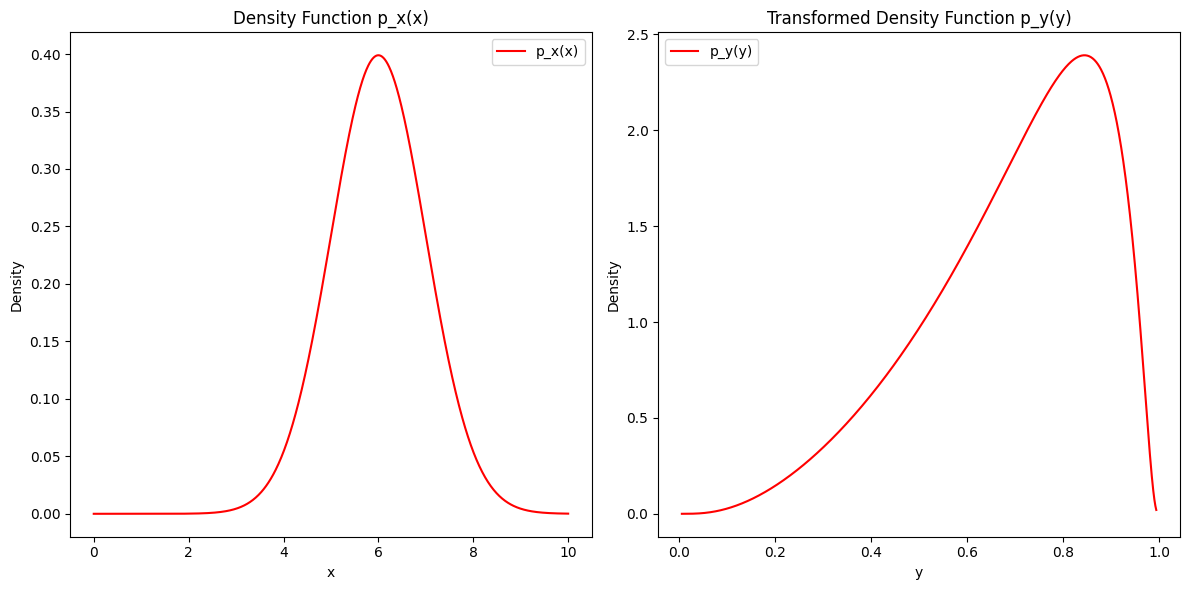

In [254]:
# define the range for x
x = np.linspace(0, 10, 1000)

# define the parameters of the Gaussian distribution
mu, sigma = 6, 1 

# define the density function of the Gaussian distribution
def p_x(x):
    return norm.pdf(x, mu, sigma)

# define the transformation function
def g(y):
    return np.log(y) - np.log(1-y) + 5
def g_inv(x):
    return 1 / (1 + np.exp(-x+5))

# apply the transformation to get the range for y
y = g_inv(x)

# define the density function of y
def p_y(y):
    return p_x(g(y)) * np.abs(np.gradient(g(y), y))

# plot the density functions side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot p_x(x) and sample
ax1.plot(x, p_x(x), label='p_x(x)', color='red')
ax1.set_title('Density Function p_x(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.legend()

# plot p_y(y)
ax2.plot(y, p_y(y), label='p_y(y)', color='red')
ax2.set_title('Transformed Density Function p_y(y)')
ax2.set_xlabel('y')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

However, if we simply transform the density function as a simple function, we obtain:

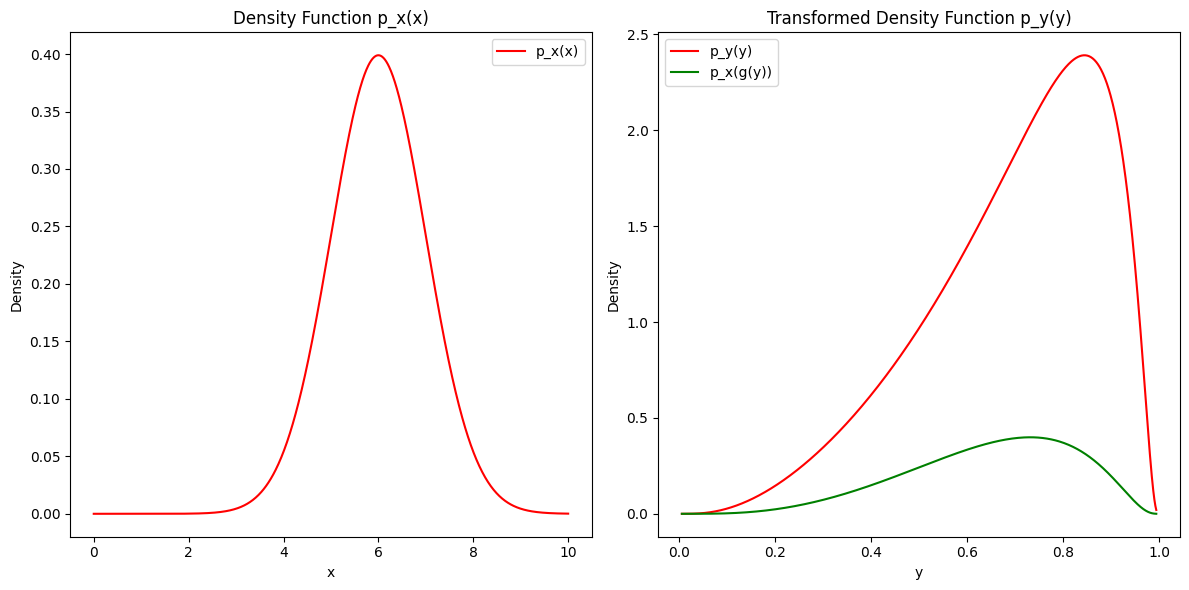

In [255]:
# plot the density functions side by side and
# compare with the simple function transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot p_x(x)
ax1.plot(x, p_x(x), label='p_x(x)', color='red')

ax1.set_title('Density Function p_x(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.legend()

# plot p_y(y) and p_x(y)
ax2.plot(y, p_y(y), label='p_y(y)', color='red')
ax2.plot(y, p_x(g(y)), label='p_x(g(y))', color='green')
ax2.set_title('Transformed Density Function p_y(y)')
ax2.set_xlabel('y')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

Note that the two function are note the same, in order to confirm the right one, we can take a sample of N values of x, evaluate the corresponding values of y using the transformation, and then plot a histogram of their values: 

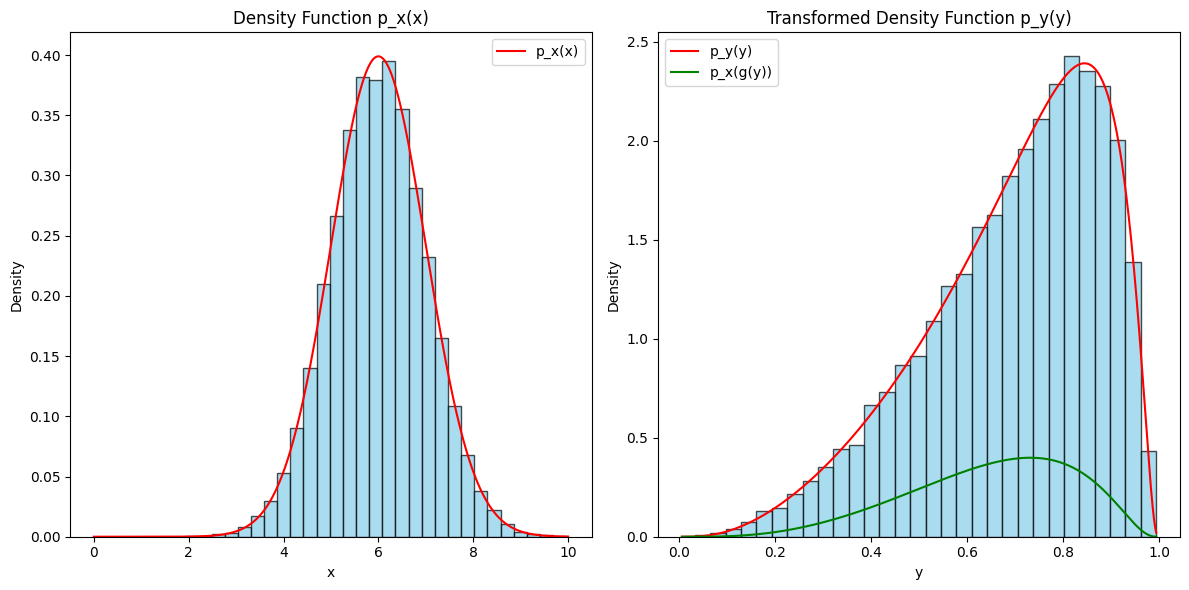

In [256]:
# number of samples to draw
num_samples = 50000  

# sample from p_x(x)
p_x_values = p_x(x)
p_x_values /= np.sum(p_x_values)
samples_x = np.random.choice(x, size=50000, p=p_x_values)

# evaluate the corresponding y values
samples_y = g_inv(samples_x)

# plot the density functions side by side and
# compare with the simple function transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot p_x(x)
ax1.plot(x, p_x(x), label='p_x(x)', color='red')
ax1.hist(samples_x, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Density Function p_x(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.legend()

# plot p_y(y) and p_x(y)
ax2.plot(y, p_y(y), label='p_y(y)', color='red')
ax2.plot(y, p_x(g(y)), label='p_x(g(y))', color='green')
ax2.hist(samples_y, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
ax2.set_title('Transformed Density Function p_y(y)')
ax2.set_xlabel('y')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()

However, in the case of a **linear transformation**, the second term vanishes, ensuring that the location of the maximum transforms consistently according to:

$\displaystyle \hat x = g(\hat y)$

We can extend the result to densities defined over multiple variables. Consider
a density over a D dimensional variable:

$\displaystyle x = (x_1, x_2, \ldots, x_D)$

and suppose we transform to a new variable 

$\displaystyle y = (y_1, y_2, \ldots, y_D)$

where 

$\displaystyle x = g(y)$

Here we will limit ourselves to the case where the two variables have the same dimensionality. The transformed density is then given by the generalization of the previous formula in the form:

$\displaystyle p_y(y) = p_x(g(y)) \left| \det J \right|$

where J is the Jacobian matrix whose elements are given by the partial derivatives, so that:

$\displaystyle J_{ij} = \frac{\partial x_i}{\partial y_j}$

We can show this idea  by considering a simple example of a two-dimensional Gaussian distribution and a nonlinear transformation of the variables:

$\displaystyle y_1 = x_1 + tanh(5 x_1)$

$\displaystyle y_2 = x_2 + tanh(5 x_2) + frac{x_1^3}{3}$

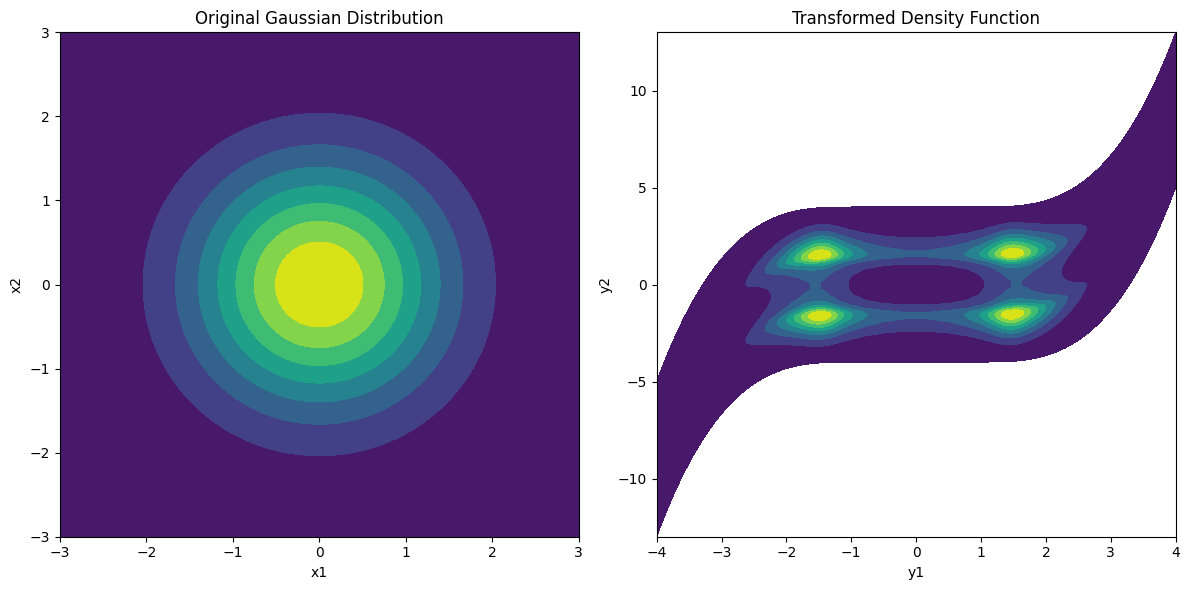

In [261]:
from scipy.stats import multivariate_normal

# define the Gaussian distribution parameters
mu = [0, 0]  # Mean of the distribution
cov = [[1, 0], [0, 1]]  # Covariance matrix

# generate a grid of (x1, x2) values
x1, x2 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
pos = np.dstack((x1, x2))

# calculate the Gaussian distribution values
rv = multivariate_normal(mu, cov)
p_x = rv.pdf(pos)

# define the transformation functions
def transformation_y1(x1):
    return x1 + np.tanh(5 * x1)
def transformation_y2(x1, x2):
    return x2 + np.tanh(5 * x2) + (x1**3) / 3

# apply the transformations to get (y1, y2)
y1 = transformation_y1(x1)
y2 = transformation_y2(x1, x2)

# calculate the transformed density function 
jacobian_determinant = np.abs(1 + 5 * (1 - np.tanh(5 * x1)**2)) * np.abs(1 + 5 * (1 - np.tanh(5 * x2)**2) + x1**2)
p_y = p_x / jacobian_determinant

# plot the original and transformed density functions side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot the original Gaussian distribution
ax1.contourf(x1, x2, p_x, cmap='viridis')
ax1.set_title('Original Gaussian Distribution')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

# plot the transformed density function
ax2.contourf(y1, y2, p_y, cmap='viridis')
ax2.set_title('Transformed Density Function')
ax2.set_xlabel('y1')
ax2.set_ylabel('y2')

plt.tight_layout()
plt.show()


Intuitively, we can view the change of variables as **expanding some regions of space and contracting others**, with an infinitesimal region around a point x being transformed to a region around the point y. The absolute value of the determinant of the Jacobian represents the ratio of these volumes.

## Hypothesis Testing

Probability theory provides a framework for formulating and testing **hypotheses** about data and the underlying processes that generate it. An hypothesis is a **testable statement** (such as "this coin is fair") which can be expressed in statistical terms to describe the data. Under specific assumptions, these statistical measures can be interpreted as observations of random variables drawn from known distributions, allowing us to evaluate **the likelihood of these assumptions being true**.

### Null and alternative hypotheses

The **null hypothesis** represents a statement of no effect or no difference in the population. Essentially, it suggests that any observed difference or effect in the data is due to random chance rather than a true underlying phenomenon. For example, in an experiment testing whether a new drug is effective, the null hypothesis might state that "the new drug has no effect on the disease compared to a placebo". The null hypothesis is tested against an **alternative hypothesis**, which posits that there is a significant effect or difference. Statistical techniques are applied to assess whether the evidence is sufficient to reject the null hypothesis in favor of the alternative. Let’s consider an example where the null hypothesis tests whether a coin is fair, meaning it has an equal probability of landing heads or tails:

$\displaystyle H_0: p = 0.5$

The alternative hypothesis challenges this assumption:

$\displaystyle H_A: p \neq 0.5$

The test involves flipping the coin N times and counting the number of heads observed. Since each coin flip is a Bernoulli trial, the total number of heads follows a Binomial distribution. For a sufficiently large N, the Binomial distribution can be approximated by a normal distribution, as per the central limit theorem.  Suppose we flip the coin 1,000 times. If the coin is indeed fair (as assumed in our null hypothesis), the number of heads should approximately follow a normal distribution with the following parameters:

Mean =  500.0
Std =  15.811388300841896


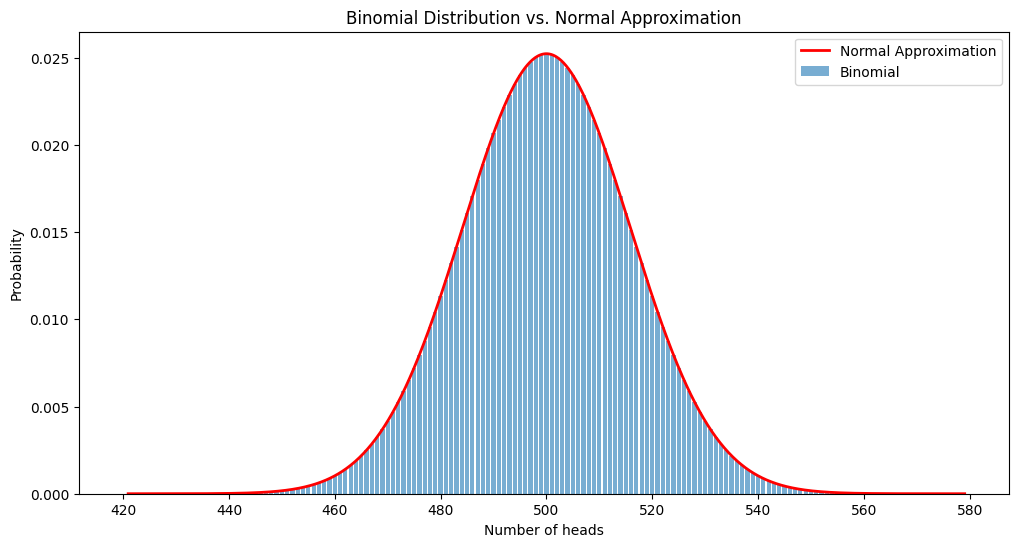

In [46]:
# numer of trials
n = 1000

# hypothesis probability (for a fair coin)
p = 0.5

# calculate the mean and standard deviation for the normal approximation
mu = p * n
sigma = np.sqrt(n * p * (1 - p))

# print the mean and standard deviation
print("Mean = ", mu)
print("Std = ", sigma)

# create an array of possible outcomes around the mean
X = np.arange(int(mu - 5*sigma), int(mu + 5*sigma) + 1)

plt.figure(figsize=(12, 6))

# Plot the binomial distribution
plt.bar(X, binom.pmf(X, n, p), alpha=0.6, label='Binomial')

# Plot the normal distribution as an approximation
x_vals = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
plt.plot(x_vals, norm.pdf(x_vals, mu, sigma), color="red", label='Normal Approximation', lw=2)

plt.title("Binomial Distribution vs. Normal Approximation")
plt.xlabel("Number of heads")
plt.ylabel("Probability")
plt.legend()
plt.show()

We can use the distribution to calculate the probability that a particular outcome falls within a specific range, or conversely, determine the range of values that corresponds to a given probability. In hypothesis testing, we need to decide on the **significance level**, which represents how much risk we are willing to accept for rejecting the null hypothesis when it is actually true. This threshold is commonly set at 5% or 1%, depending on how strict or rigorous we want the test to be:

![](images/prob-significance.png)

In our example:

In [48]:
lower_bound, upper_bound = norm.interval(0.95, loc=mu, scale=sigma)

print("lower bound = ", lower_bound)
print("upper bound = ", upper_bound)

lower bound =  469.0102483847719
upper bound =  530.9897516152281


In other words, if the coin is fair (i.e., the null hypothesis is true), there is only a 5% probability of observing a value that falls outside this interval.

### Test power

We are also often concerned with the **power** of a statistical test, which is the probability of correctly rejecting the hypothesis when it is false (avoiding a **false negative** error). It represents the probability of detecting a true effect, assuming that the effect actually exists:

![](images/prob-power.png)

For the coin example, let's explore what happens if the actual value of p is 0.55, meaning the coin is slightly biased toward heads. In this case, we can calculate the power of the test:

In [50]:
# probability of landing heads (slightly biased)
p = 0.55

# calculate the mean and the standard deviation 
mu_real = p * n
sigma_real = np.sqrt(n * p * (1 - p))

# print the mean and standard deviation
print("Mean real = ", mu_real)
print("Std real = ", sigma_real)

Mean real =  550.0
Std real =  15.732132722552272


False negative error means we fail to reject the null hypothesis which will happen when X is still in our original interval:

In [51]:
power = 1 - norm.cdf(upper_bound, mu_real, sigma_real)

print("power = ", power)

power =  0.8865476494917938


### p-values

An alternative way to think about the preceding test involves **p-values**, which measure the probability of observing a value **as extreme as, or more extreme than, the one obtained**, assuming the null hypothesis is true. The smaller the p-value, the greater the statistical significance of the observed result. In essence, the p-value quantifies how likely it is that the observed data occurred by random chance under the assumption that the null hypothesis holds.

![](images/prob-p-value.png)

For example, if we were to see a certain number of heads, we would compute:

In [61]:
1 - norm.cdf(515, mu, sigma)

0.17139085557395572

If the p-value is less than or equal to the chosen significance level, the null hypothesis is rejected; otherwise, it is not rejected. The p-value provides **a measure of the strength of evidence against the null hypothesis**, independent of any preselected significance level. The following guidelines are often used to interpret p-values:

- $\displaystyle p > 0.1$ : weak or no evidence against the null hypothesis
- $\displaystyle 0.05 < p < 0.1$ : moderate evidence against the null hypothesis
- $\displaystyle 0.01 < p < 0.05$ : strong evidence against the null hypothesis
- $\displaystyle p < 0.01$ : very strong evidence against the null hypothesis

In the example, since the p-value is greater than our 5% significance, we don’t reject the null-hypothesys. However, if we instead saw a different number of heads, the p-value would be:

In [62]:
1 - norm.cdf(530, mu, sigma)

0.028889785561798664

which is smaller than the 5% significance, which means we would reject the null. Notice that If we're determined to find "significant" results, we usually can. By testing enough hypotheses on the same dataset, it's almost inevitable that one will appear significant purely by chance. For instance, we can repeatedly perform an experiment (such as flipping a coin 1.000 times) until we obtain a result that seems significant, even if it doesn't reflect a true effect:

In [83]:
import random

# function to simulate a single experiment of 1000 coin flips
def run_experiment():
    # returns a list of 1000 boolean values where 
    # True represents "heads" (50% probability)
    return [random.random() < 0.5 for _ in range(1000)]

# function to decide whether to reject the hypothesis that the coin is fair
def reject_fairness(experiment):
    # count the number of heads (True values) in the experiment
    num_heads = len([flip for flip in experiment if flip])
    # reject fairness if the number of heads is outside the range [469, 531]
    # This range is based on a 95% confidence interval for a fair 
    # coin with 1000 flips
    return num_heads < 469 or num_heads > 531

# simulate 1000 experiments, each consisting of 1000 coin flips
experiments = [run_experiment() for _ in range(1000)]

# count how many experiments result in rejecting the null 
# hypothesis (fair coin)
num_rejections = len([experiment for experiment in experiments if reject_fairness(experiment)])

# print the number of times the null hypothesis is rejected
print(num_rejections)

41


This gives an empirical estimate of how often the fairness of the coin would be incorrectly rejected due to random fluctuations. This practice is known as **p-hacking**: manipulating analyses or repeatedly testing hypotheses until statistically significant results appear. To conduct robust and reliable science, **we should define our hypotheses before examining the data**, clean our data independently of our hypotheses, and remember that **p-values are not a replacement for critical thinking** or common sense. A valuable critique of this approach can be found in [J. Cohen, **The Earth Is Round**](https://psycnet.apa.org/doiLanding?doi=10.1037%2F0003-066X.49.12.997).